In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

# read table from link
# set first column as index
df = pd.read_excel('https://query.data.world/s/upi74k7zacascltdp3iijpbjiqtuvp', index_col = 0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Rat to Goose
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   15 non-null     float64
 1   Male    15 non-null     float64
 2   Female  15 non-null     float64
dtypes: float64(3)
memory usage: 480.0+ bytes


In [3]:
df['diff'] = abs(df.Male - df.Female)
df['pos_neg'] = df.apply(lambda x: x['Total']*-1 if x['Total'] <.5 else x['Total'],  axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Rat to Goose
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Total    15 non-null     float64
 1   Male     15 non-null     float64
 2   Female   15 non-null     float64
 3   diff     15 non-null     float64
 4   pos_neg  15 non-null     float64
dtypes: float64(5)
memory usage: 720.0+ bytes


In [4]:
df = df.sort_values(by = 'pos_neg', ascending = True)

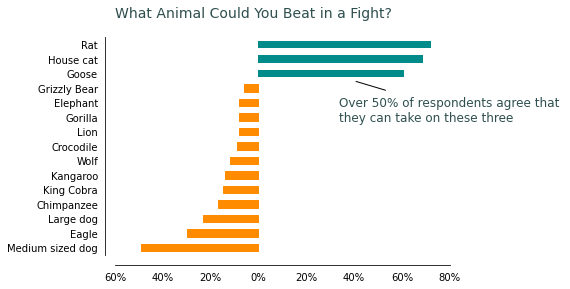

In [5]:
fig, ax = plt.subplots()
df.plot.barh(y = 'pos_neg', ax = ax, color = 'darkcyan', legend = None, title = '')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.tick_params(left = False,  bottom = False)

ticks_loc = ax.get_xticks().tolist()
ax.set_xticks(ticks_loc)

labels = [f'{abs(t):0.0%}' for t in ax.get_xticks()]
ax.set_xticklabels(labels)
ax.annotate('Over 50% of respondents agree that \nthey can take on these three',xy=(0.4,11.5), xytext=(-15, -15), 
            textcoords='offset points',
            ha='left',va='top',color='darkslategray',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"),
            arrowprops=dict(arrowstyle='-', lw=1))

ax.set_title('What Animal Could You Beat in a Fight?', 
             loc = 'left', size = 14, color = 'darkslategray', pad = 20)

ax.set_ylabel('')
for patch in ax.patches[:-3]:
    patch.set_color('darkorange')



Text(0, 0.5, '')

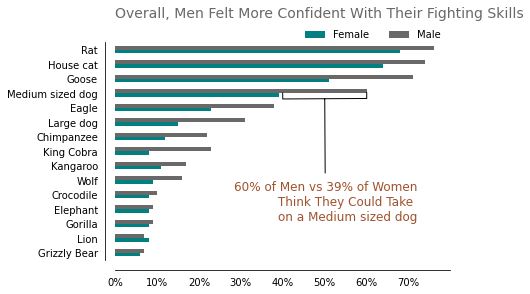

In [6]:
fig2, ax2 = plt.subplots()

df.sort_values(by = 'Total')[['Female','Male']].plot.barh(ax = ax2, 
                                                          color = {'Female':'teal', 'Male' : 'dimgray'})

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_position(('outward', 10))
ax2.spines['bottom'].set_position(('outward', 10))
ax2.tick_params(left = False,  bottom = False)
ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1,0))

ax2.set_title('Overall, Men Felt More Confident With Their Fighting Skills', 
             loc = 'left', size = 14, color = 'dimgray', pad = 25)

ax2.legend(ncol = 2, frameon = False, loc = 'upper right', bbox_to_anchor = (1,1.1))

ax2.annotate('60% of Men vs 39% of Women\n Think They Could Take \non a Medium sized dog',xy=(.5,10.75), xytext=(.72, 5), 
            xycoords='data', textcoords = 'data',
            ha='right',va='top',color='sienna',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"),
            arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=0.5', lw=1))
ax2.set_ylabel('')



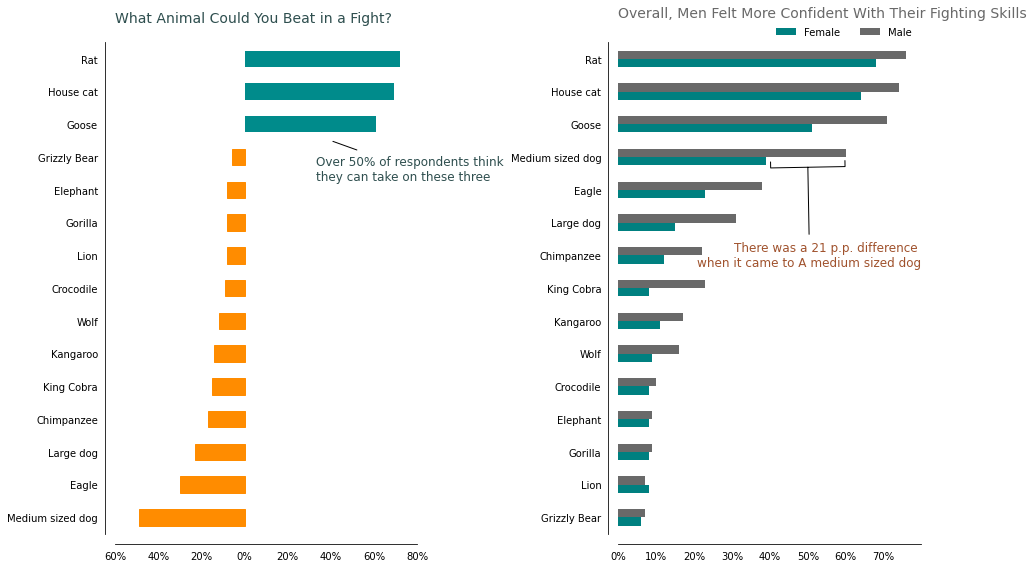

In [43]:
fig, ax = plt.subplots(1,2, figsize = (13,8))

df.plot.barh(y = 'pos_neg', ax = ax[0], color = 'darkcyan', legend = None, title = '')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_position(('outward', 10))
ax[0].spines['bottom'].set_position(('outward', 10))
ax[0].tick_params(left = False,  bottom = False)

ticks_loc = ax[0].get_xticks().tolist()
ax[0].set_xticks(ticks_loc)

labels = [f'{abs(t):0.0%}' for t in ax[0].get_xticks()]
ax[0].set_xticklabels(labels)
ax[0].annotate('Over 50% of respondents think \nthey can take on these three',xy=(0.4,11.5), xytext=(-15, -15), 
            textcoords='offset points',
            ha='left',va='top',color='darkslategray',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"),
            arrowprops=dict(arrowstyle='-', lw=1))

ax[0].set_title('What Animal Could You Beat in a Fight?', 
             loc = 'left', size = 14, color = 'darkslategray', pad = 20)

ax[0].set_ylabel('')
for patch in ax[0].patches[:-3]:
    patch.set_color('darkorange')

df.sort_values(by = 'Total')[['Female','Male']].plot.barh(ax = ax[1], 
                                                          color = {'Female':'teal', 'Male' : 'dimgray'})

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_position(('outward', 10))
ax[1].spines['bottom'].set_position(('outward', 10))
ax[1].tick_params(left = False,  bottom = False)
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1,0))

ax[1].set_title('Overall, Men Felt More Confident With Their Fighting Skills', 
             loc = 'left', size = 14, color = 'dimgray', pad = 25)

ax[1].legend(ncol = 2, frameon = False, loc = 'upper right', bbox_to_anchor = (1,1.05))
ax[1].set_ylabel('')

ax[1].annotate('There was a 21 p.p. difference \nwhen it came to A medium sized dog',
               xy=(.5,10.75), xytext=(.8, 8), 
            xycoords='data', textcoords = 'data',
            ha='right',va='center',color='sienna',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"),
            arrowprops=dict(arrowstyle='-[, widthB=3.1, lengthB=0.5', lw=1))

plt.tight_layout()

